# Quantum Machine Learning challenge

Welcome to the Quantum Machine Learning challenge of the MQST Qiskit Fall Fest!
In this challenge, you will explore how quantum computing (QC) and machine learning (ML) can be brought together in the exciting field of Quantum Machine learning (QML). You will start using quantum computers for a simple classical classification task, and your fundamental challenge will be to design a "Quantum Neural Network" (QNN) that classifies input quantum data according to the phase it corresponds to.

This challenge is divided in two parts:
- Deal with a classical classification problem with a parametrized quantum computer. You will be asked to encode and process the data on a paramtrized quantum computer, and finally train it classically to attempt to solve the problem.
- Deal with a quantum classification task, to learn to identify the phases, and reconstruct the phase diagram, of a quantum spin chain. You will reuse the process from the previous section, but instead of embeding classical data into the quantum computer, you will now input the spin states as the initial state of the quantum computer.

#### First install the necessary packages if you haven't already:

In [3]:
# Uncomment to install the necessary packages

%pip install --upgrade pip
%pip install numpy==2.3.4
%pip install scipy==1.16.2
%pip install matplotlib==3.10.7
%pip install jupyter
%pip install qiskit[visualization]==2.2
# # For Local Linux or Mac, you can use the following command:
# # %pip install 'qiskit[visualization]'
%pip install qiskit_algorithms==0.4.0
%pip install qiskit_aer==0.17.2
%pip install qiskit_ibm_runtime==0.41.1
%pip install qiskit_ibm_transpiler==0.14.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 26.1 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.4 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 23.8 MB/s  0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 146.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [jupyter]
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 18.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.5 MB/s  0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136897 sha256=3af977e3c30b1565470ec715780d91da99b91dc1d309b378181d115191b38851
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [qiskit]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.8 MB/s  0:00:00
   ━━━

---

## 1.Introduction

This introduction and gives a brief overview of the machine learning idea that is considered:

If not of machine learning, everyone has heard of artificial intelligence. From humbler origins, to the current large language models, machine learning has permeated everything and become widespread. We will focus on the supervised learning paradigm. Simplifying, we look to solve a problem where we want to assign to each input $x$ some corresponding output $y = f(x)$. In fact this is a very general way to see any problem, so we note two distinct examples:
- An example is finding how many prime factors an integer has. This is a simple problem in the sense that we **know** how to express the $f$ that solves it, although that does not mean it is easy to do so efficiently. In this case, it has only been after Shor's quantum algorithm that this problem, previously thought of as computationally hard, has been "broken".
- A much different example is the task of classifying pictures of cats and dogs. In this case we know, or rather we assume, that there is some function that solves the problem because **we** can solve it. We can manually look at pictures and tell if it contains a cat or a dog. In spite of this, no one is able to come up with a simple and direct computer algorithm to solve this task.

It is for these latter kind of problems where supervised learning shines the most. The fundamental principle is that instead of trying to find this goal function $f$ directly, we take a generic parametrized guess. Now, exploiting that we can previously prepare some sample inputs/outputs (such as prelabelled cats and dogs pictures), we tweak our parameters to find the best fit. In fact, you have already done supervised learning before, as taking a linear regression is technically just that, where the guess (ansatz) is a linear function. Similarly, just as a linear regression will not directly work for a non linear problem, this choice of our ansatz is important for each problem.

On the other hand, quantum computing has emerged to find the physical limit of information processing, and ideas of combining it with machine learning happened soon after. There are many ways one can quantumly enhance machine learning, such as doing some computational-heavy steps on a possibly faster quantum computer. We will instead focus on using a parametrized quantum computer as ansatz for the problem solving function $f$, a so-called (abusing language) Quantum Neural Network. Your goal during this whole challenge is to design good models for quantum machine learning, which is still an ongoing research question while quantum resources are limited to perform big scale tests.

First you will apply it for a classical problem, which will probably turn out bad! Even if Quantum Computers can do some tasks better, it is important to realise this is not an actually easy goal to achieve. Quantum intuition can differ a lot from classical intuition, so it is hard to come up with good designs. Finally, you will apply it for Quantum Phase Recongition.


### A simple task

Consider the following classical data points, which are classified into one of two classes. Our goal is to learn to perform this classification, not by memorizing every point but rather by learning the underlying rule, so we will able to classify new points too. Below this data is generated and you can see it ploted, with two different classes


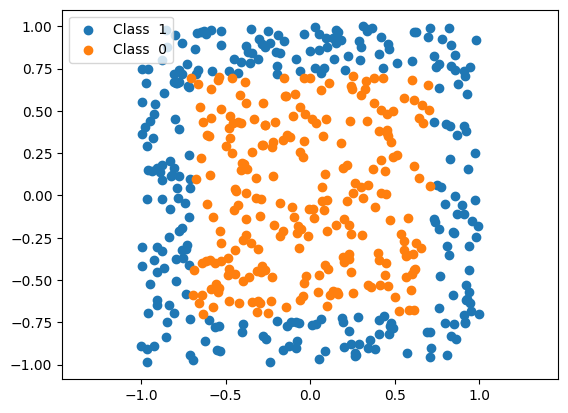

In [17]:
import numpy as np
import matplotlib.pyplot as plt

## Set random seed so results are repeatable
np.random.seed(2025)

## Underlying classification, outside of square or inside
def underlying_function(R: np.ndarray):
    return np.max(np.abs(R), axis=1) > 1/np.sqrt(2)


## Prepare random dataset
Nsamples = 500
R = 2*np.random.random((Nsamples,2)) - np.array([1,1])  # Data points, uniform in [-1,1]x[-1,1]

y = underlying_function(R)   # Classification

R_class1 = R[y]                    # Class +1: Outside of square
R_class0 = R[np.logical_not( y )]  # Class  0: Inside  of square

plt.axis('equal')
plt.scatter(R_class1[:,0], R_class1[:,1], label="Class  1")
plt.scatter(R_class0[:,0], R_class0[:,1], label="Class  0")
plt.legend(loc = "upper left")

The underlying function is simple: points inside the $\sqrt{2}$ square are in class 0 and points outside in class 1, but we must now try to learn this in a generic way, even if this is a simple case.
We will learn to classify points, by learning the underlying distribution, which you can see is $f(\vec{x}) = 0$, if $\vec{x} \in [-\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}] \times [-\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}] $; $\quad 1$ otherwise. To do this, you will create a Quantum Neural Network (QNN) and later you will train it on the data.

### 1.1 Classical to Quantum

Let's create the Quantum Neural Network. First, encode your problem, your data, into the quantum computer. Do it for a very simple 2 qubit QC.
> Hint: As an example you may use Qiskit's `qiskit.circuit.library.ZZFeatureMap` or `ZFeatureMap` to encode real numbers as angles of rotation on each qubit

You will also want to define some processing layers that use trainable parameters.
> Hint: If you do not want to manually construct them, with gates, you may use provided examples like `qiskit.circuit.library.EfficientSU2` or `qiskit.circuit.library.TwoLocal`

The principle is to use gates, such as $R_Y$ rotations, where the angles will be given according to some input/tunable parameters


**The code snippets are orientative to guide you through the problems, but feel free to come up with your own solutions**. For instance, you may mix input parameters and trainable parameters on the same gate, or intertwine gates (also called data re-reuploading) instead of applying encoding first and processing later. Some of these ideas will also be proposed later


In [18]:
## Your code here
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap     # Example featuremap/encoding
from qiskit.circuit.library import EfficientSU2, RealAmplitudes  # Example processing layer

# Example of parameters you may use. Default input. If using default, inputs are called x and trainable_parameters θ
inputs = ParameterVector('x', 2)
trainable_parameters = ParameterVector('θ', 8)

# By default, you may use only 2 qubits, one for each coordinate

def encoding(inputs: ParameterVector) -> QuantumCircuit:
    """Returns an encoder that will encode a point in space (x,y) into a quantum circuit.

    Args:
        inputs (ParameterVector): parameters corresponding to input (x, y)

    Returns:
        encoding_circuit (QuantumCircuit): Returns a QuantumCircuit, which encodes the classical data into the circuit
    """
    # YOUR CODE HERE

    ec=QuantumCircuit(2)

    ec.h(0)
    ec.h(1)
    ec.p(inputs[0],0)
    ec.p(inputs[1],1)


    return ec


def processing(trainable_parameters: ParameterVector):
    """Returns a processing layer that will be trained to try to solve our problem

    Args:
        trainable_parameters (ParameterVector): parameters that will be trained to attempt to solve the problem

    Returns:
        processing_circuit (QuantumCircuit): Returns a QuantumCircuit that encodes the data into the circuit
    """
    # YOUR CODE HERE

    pc=QuantumCircuit(2)
    pc.rz(trainable_parameters[0],0)
    pc.rz(trainable_parameters[1],1)
    pc.ry(trainable_parameters[2],0)
    pc.ry(trainable_parameters[3],1)
    pc.cx(0,1)
    pc.rz(trainable_parameters[4],0)
    pc.rz(trainable_parameters[5],1)
    pc.ry(trainable_parameters[6],0)
    pc.ry(trainable_parameters[7],1)

    return pc


Here you may draw your encoding,

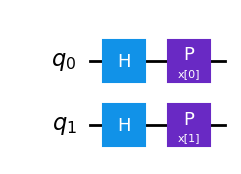

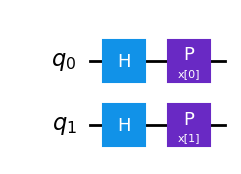

In [19]:
encoding_circuit = encoding(inputs)
encoding_circuit.draw(output='mpl', style='textbook')

processing

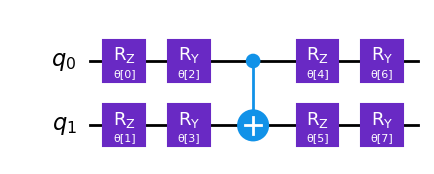

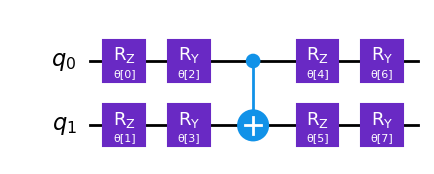

In [20]:
processing_circuit = processing(trainable_parameters)
processing_circuit.draw(output='mpl', style='textbook')

and their combination:
> Again, remember you can join encoding and processing layers differently, or mix them

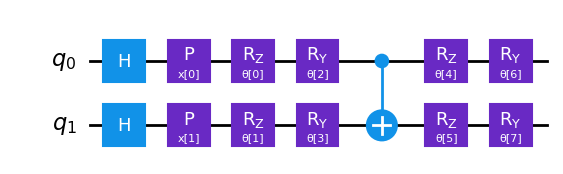

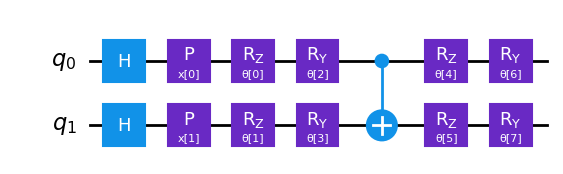

In [21]:
# Assign our parameters, may need to adapt
encoding_circuit.assign_parameters(inputs, inplace=True)
processing_circuit.assign_parameters(trainable_parameters, inplace=True)

# Define our QNN Circuit
qnn_circuit = encoding_circuit.compose(processing_circuit)
qnn_circuit.draw(output='mpl', style='textbook')


### 1.2. Finish your QNN

You have prepared a quantum circuit, parametrized, that will attempt to classify our data, you now need to define how to interpret the circuit outputs to do the classification. We can do so by reading the output, for instance the first qubit, and using and assigning the class according to the result (measuring 0 or measuring 1). Moreover, you can treat the output as the probability vector of the different outcomes, and train it accordingly.


Keep in mind that Qiskit uses Little Endian notation (top qubit q[0] is last qubit and so on $|abc\rangle \to$ q[0]=c, q[1]=b, q[2]=a), and that the default sampler output is the integer representation of the bitstring you need to interpret.

To do this, define a forward function, to evaluate running our QNN.

> Again, all function suggestions are orientative. If you prefer you may also work with Estimators (expectation values) instead of Samplers.

In [ ]:
#from qiskit_machine_learning.neural_networks import EstimatorQNN, SamplerQNN    # Libraries which could simplify process, but icompatible with qiskit 2>
#from qiskit_machine_learning.algorithms import NeuralNetworkClassifier
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService
from qiskit_ibm_runtime import Sampler
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms.gradients import ParamShiftSamplerGradient


# Define a forward pass of your QNN

def forward(circuit, input_params, weight_params):
    num_samples = input_params.shape[0]
    observable = SparsePauliOp('ZZ')
    weights = np.broadcast_to(weight_params, (num_samples, len(weight_params)))
    params = np.concatenate((input_params, weights), axis=1)
    pub = (circuit, observable, params)
    job = Estimator(mode=AerSimulator()).run([pub])
    result = job.result()[0]
    expectation_values = result.data.evs

    return expectation_values

trainable_parameters_0=np.random.rand(8)

forward(qnn_circuit, R, trainable_parameters_0)


### 1.3 Train your QNN

Now you must train your QNN, to do this define a loss funciton and an optimizer.


For instance, use a mean squared error loss function of the form
$$\sum (QNN_{\vec{\theta}}(\vec{x_i})-y_i)^2,$$
where $QNN()$ represents the output of your quantum circuit (forward pass). If you are following the example, then the output of the QNN is the array of probabilities for each outcome (classification), so you should treat $y_i$ as a vector too (either [1,0] or [0,1])






In [ ]:
def mse_loss_weights(input_params, weight_params: np.ndarray) -> np.ndarray:
    """
    Cost function for the optimizer to update the ansatz parameters.

    weight_params: ansatz parameters to be updated by the optimizer.

    output: MSE loss.
    """
    predictions = forward(
        circuit=qnn_circuit,
        input_params=input_params,
        weight_params=weight_params
    )
    target = underlying_function(input_params)

    cost = np.mean((predictions - target) ** 2)

    global iter
    if iter % 50 == 0:
        print(f"Iter: {iter}, loss: {cost}")
        loss_results.append(cost)
    iter += 1

    return cost

In [ ]:
# Your code here




Minimize the loss, computed for your data points, to train your model. You can use scipy's minimize, with built in optimizers such as COBYLA.


Store also the loss evolution (and other parameters you consider interesting) to plot them later.

> Hint: Remember to look for Qiskit resources, for instance you may find [this](https://quantum.cloud.ibm.com/learning/en/courses/quantum-machine-learning/qvc-qnn) tutorial useful.

In [55]:
from scipy.optimize import minimize

num_epochs=1
batch_size=100
loss_results=[]
weight_params=trainable_parameters_0
for n in range(num_epochs):
    for i in range((len(R)//batch_size)):
        iter=0
        start_i=i*batch_size
        end_i=start_i+batch_size
        batch_input_params=R[start_i:end_i]
        res = minimize(fun=lambda x: mse_loss_weights(batch_input_params, x), x0=weight_params, method="COBYLA", options={"maxiter": 50})
        weight_params = res["x"]
        loss_results.append(res['fun'])
        print(f"batch result: {res['fun']}")




Iter: 0, loss: 0.5275757145881653
Iter: 25, loss: 0.30893579721450803
batch result: 0.3003674364089966
Iter: 0, loss: 0.32001638889312745
Iter: 25, loss: 0.30433920383453367
batch result: 0.29666083812713623
Iter: 0, loss: 0.32122236251831054
Iter: 25, loss: 0.2923570156097412
batch result: 0.29029115676879885
Iter: 0, loss: 0.31241928339004515
Iter: 25, loss: 0.2951330542564392
batch result: 0.2917360854148865
Iter: 0, loss: 0.2959225058555603
Iter: 25, loss: 0.2867403435707092
batch result: 0.2809308433532715


In [58]:
print(weight_params)

[ 2.55918183  3.11709857  2.36724708  0.62142981  1.27921849  3.42592005
 -0.31422987 -0.0724293 ]


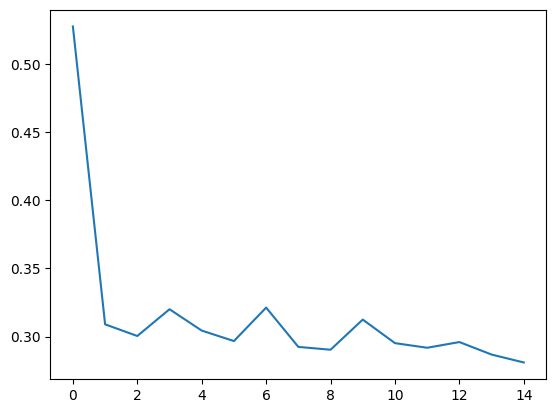

In [56]:
plt.plot(loss_results)

#### 1.4 Plot your reconstructed classification

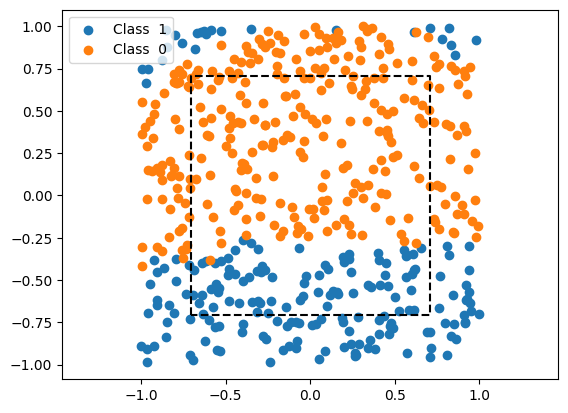

In [109]:
def QNN_classifier(input_params: np.ndarray):
    predictions = forward(qnn_circuit, input_params, weight_params)

    predictions = predictions > 0.50
    return predictions

def plot_prediction(QNN_classifier):
    """Auxiliar function to plot classification. Feel free to modify it"""
    # Making prediction


    prediction = QNN_classifier(R)

    is_one = prediction == 1

    predicted_R_class1 = R[is_one]                    # Class +1: Outside of square
    predicted_R_class0 = R[np.logical_not( is_one )]  # Class  0: Inside  of square

    ## PLOT Prediction
    plt.axis('equal')

    # Draw square
    plt.plot([-np.sqrt(2)/2, -np.sqrt(2)/2, np.sqrt(2)/2, np.sqrt(2)/2, -np.sqrt(2)/2], [-np.sqrt(2)/2, np.sqrt(2)/2, np.sqrt(2)/2, -np.sqrt(2)/2, -np.sqrt(2)/2], 'k--')
    plt.scatter(predicted_R_class0[:,0], predicted_R_class0[:,1], label="Class  1")
    plt.scatter(predicted_R_class1[:,0], predicted_R_class1[:,1], label="Class  0")
    plt.legend(loc = "upper left")

plot_prediction(QNN_classifier)

### 1.5 Explore
These sections is more optional, if you are doing well you may skip to section 2 already. If you get stuck at section 2, you can get back to work on it, or work on it later, or split it with other members of the group.


#### 1.5.1 Data re-uploading

Instead of just changing the encoding layer and the processing layer, explore here if you can obtain better results by intertwining them:

Build your circuit with an encoding layer, a processing layer, another encoding layer and another processing layer. As this will increase the complexity, you may also want to simplify the layers themselves. Try with different ammounts of intertwining, do you get better results?

In [ ]:
# Code here
trainable_parameters2 = ParameterVector('θ2', 8) #nou set de parametres entrenables

encoding_circuit2 = encoding(inputs2)
processing_circuit2 = processing(trainable_parameters2)

#we add two processing layers
qnn_circuit2 = encoding_circuit.compose(processing_circuit.compose(encoding_circuit.compose(processing_circuit2)))
qnn_circuit2.draw(output='mpl', style='textbook')

In [ ]:
trainable_parameters_1=np.random.rand(16) #doblem els paràmetres per tenir en compte les dues capes de processament


def mse_loss_weights2(input_params, weight_params: np.ndarray) -> np.ndarray:
    """
    Cost function for the optimizer to update the ansatz parameters.

    weight_params: ansatz parameters to be updated by the optimizer.

    output: MSE loss.
    """
    predictions = forward(
        circuit=qnn_circuit2,
        input_params=input_params,
        weight_params=weight_params
    )
    target = underlying_function(input_params)

    cost = np.mean((predictions - target) ** 2)

    global iter
    if iter % 50 == 0:
        print(f"Iter: {iter}, loss: {cost}")
        loss_results.append(cost)
    iter += 1

    return cost

forward(qnn_circuit2, R, trainable_parameters_1)

def QNN_classifier2(input_params: np.ndarray):
    predictions = forward(qnn_circuit2, input_params, weight_params)

    predictions = predictions > 0.50
    return predictions

In [ ]:
from scipy.optimize import minimize

trainable_parameters_1=np.random.rand(16)
num_epochs=1
batch_size=100
loss_results=[]
weight_params1=trainable_parameters_1
for n in range(num_epochs):
    for i in range((len(R)//batch_size)):
        iter=0
        start_i=i*batch_size
        end_i=start_i+batch_size
        batch_input_params=R[start_i:end_i]
        res = minimize(fun=lambda x: mse_loss_weights2(batch_input_params, x), x0=weight_params1, method="COBYLA", options={"maxiter": 50})
        weight_params1 = res["x"]
        loss_results.append(res['fun'])
        print(f"batch result: {res['fun']}")

In [ ]:
print(weight_params1)
plt.plot(loss_results)

In [ ]:
def plot_prediction2(QNN_classifier):
    """Auxiliar function to plot classification. Feel free to modify it"""
    # Making prediction


    prediction = QNN_classifier(R)

    is_one = prediction == 1

    predicted_R_class1 = R[is_one]                    # Class +1: Outside of square
    predicted_R_class0 = R[np.logical_not( is_one )]  # Class  0: Inside  of square

    ## PLOT Prediction
    plt.axis('equal')

    # Draw square
    plt.plot([-np.sqrt(2)/2, -np.sqrt(2)/2, np.sqrt(2)/2, np.sqrt(2)/2, -np.sqrt(2)/2], [-np.sqrt(2)/2, np.sqrt(2)/2, np.sqrt(2)/2, -np.sqrt(2)/2, -np.sqrt(2)/2], 'k--')
    plt.scatter(predicted_R_class1[:,0], predicted_R_class1[:,1], label="Class  1")
    plt.scatter(predicted_R_class0[:,0], predicted_R_class0[:,1], label="Class  0")
    plt.legend(loc = "upper left")

plot_prediction2(QNN_classifier2)

## 2. Putting more quantum in Quantum Machine Learning

Right now you have worked on a classical classification problem using quantum computers. Now we switch to the main challenge.

Your task will be to train a quantum machine learning model to classify which phase of matter corresponds to each input quantum state.

We are going to study now the XY model on a periodic chain, with a hamiltonian representing its energy and properties given by

$$H = -\sum^N_{j=1} \left [ \left(\frac{1+\gamma}{2}\right) X_j X_{j+1} + \left(\frac{1-\gamma}{2}\right) Y_j Y_{j+1}  + h Z_j \right],$$

with $\sigma_{N+1}=\sigma_1$.
It has the following simple phase diagram, where we will focus on the $h,\gamma>0$ region, with phase transitions at $h = 1$ and at the circular boundary $\gamma^2 + h^2 = 1$:

![image.png](attachment:image.png)

### 2.1 Implement the hamiltonian


First you must implement the hamiltonian in Qiskit

In [170]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Statevector

def XY_hamiltonian(gamma: float, h: float, Nsites: int) -> SparsePauliOp:
    """Return the many-body Hamiltonian H."""
    if Nsites < 2:
        raise ValueError('Need at least two sites to define the XY Hamiltonian.')
    pauli_words = []
    coefficients = []
    for site in range(Nsites):
        neighbour = (site + 1) % Nsites
        def label(mapping):
            word = ['I'] * Nsites
            for qubit, op in mapping.items():
                word[Nsites - qubit - 1] = op
            return ''.join(word)
        pauli_words.append(label({site: 'X', neighbour: 'X'}))
        coefficients.append(-0.5 * (1.0 + gamma))
        pauli_words.append(label({site: 'Y', neighbour: 'Y'}))
        coefficients.append(-0.5 * (1.0 - gamma))
        pauli_words.append(label({site: 'Z'}))
        coefficients.append(-h)
    return SparsePauliOp(pauli_words, coefficients).simplify()

### 2.2 Solve it classically

Create a classical method to find the ground states of the hamiltonian
> hint: use libraries such as eigsh to diagonalise the hamiltonian with `.to_matrix()`

The steps are similar to the case before, but now the inputs do not need to be directly embeded into the quantum computer as they are already quantum states. You can use `.prepare_state()`. You can start simple, with N=6 qubits.

In [171]:
from scipy.sparse.linalg import eigsh

def XY_ground_state(gamma: float, h: float, Nsites: int) -> np.ndarray:
    """Returns the ground state for the corresponding XY hamiltonian

    Args:
        gamma (double): gamma parameter of hamiltonian
        h (double): h transverse field parameter
        Nsites (int): Number of spin sites, equivalent to number of qubits for a one to one mapping

    Returns:
        ground_state (np.ndarray): ground state of the corresponding hamiltonain
    """
    # YOUR CODE HERE

    operator = XY_hamiltonian(gamma, h, Nsites)
    sparse_matrix = operator.to_matrix(sparse=True).tocsc()
    eigenvalues, eigenvectors = eigsh(sparse_matrix, k=1, which='SA')
    ground_state = eigenvectors[:, 0]
    return ground_state/np.linalg.norm(ground_state)


In [172]:
XY_ground_state(0.5,0.6,2)

array([-2.55351296e-15+1.83186799e-15j, -5.46903304e-01+4.48215100e-01j,
       -5.46903304e-01+4.48215100e-01j, -1.11022302e-15+9.99200722e-16j])

### 2.3 Construct the QNN

Construct your QNN model that will, after training, attempt to classify each input quantum state to the correct phase. You may start with a small number of qubits, 6, to check things work, and scale up later.

In this case, you won't need to encode your data, as you can map each spin to a qubit directly. You can input states into qiskit circuits directly, and this is how you can deal with this challenge, with tools like `StatePreparation`. Construct your QNN here, you can adapt your processing layers you designed in section 1.2. Notice that now you have more classes, so you may want to use 2 output qubits instead of just 1.

/tmp/ipython-input-2273629805.py:9: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  xy_ansatz = EfficientSU2(num_qubits=Nqubits, reps=2, entanglement="linear")


ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15]), ParameterVectorElement(θ[16]), ParameterVectorElement(θ[17]), ParameterVectorElement(θ[18]), ParameterVectorElement(θ[19]), ParameterVectorElement(θ[20]), ParameterVectorElement(θ[21]), ParameterVectorElement(θ[22]), ParameterVectorElement(θ[23]), ParameterVectorElement(θ[24]), ParameterVectorElement(θ[25]), ParameterVectorElement(θ[26]), ParameterVectorElement(θ[27]), ParameterVectorElement(θ[28]), ParameterVectorElement(θ[29]), ParameterVectorElement(θ[30]), ParameterVectorElement(θ[31]), Par

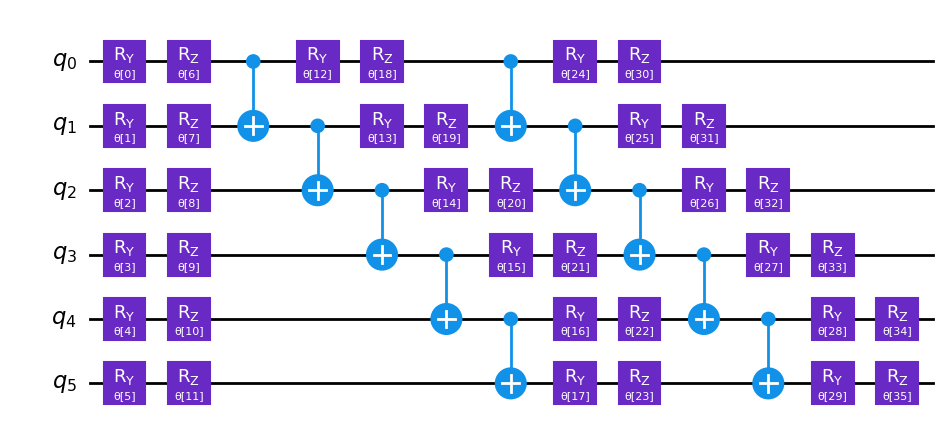

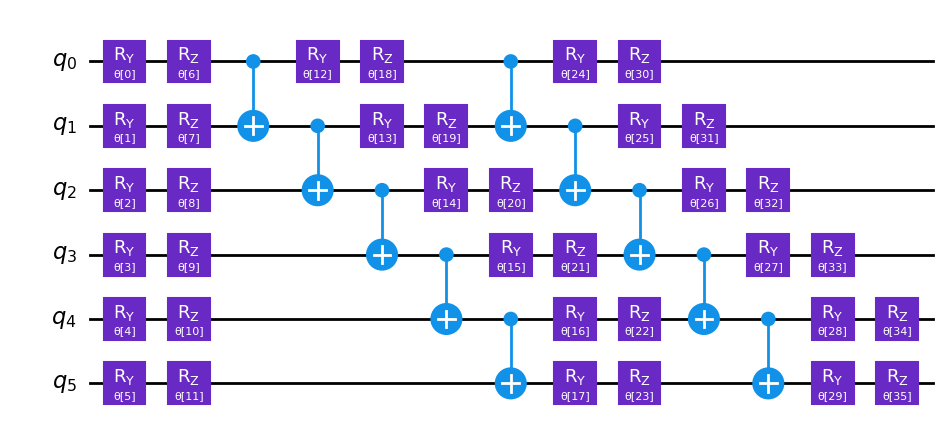

In [173]:
from qiskit.circuit import Parameter
from qiskit.primitives import BaseSamplerV2
from qiskit_ibm_runtime import Sampler  # actual to use
from qiskit.circuit.library import EfficientSU2, RealAmplitudes, StatePreparation

Nqubits = 6
initial_weights = np.random.rand(36)

xy_ansatz = EfficientSU2(num_qubits=Nqubits, reps=2, entanglement="linear")
xy_parameter_vector = ParameterVector("φ", length=len(xy_ansatz.parameters))

print(xy_ansatz.parameters)


def QNN_XY_circuit(parameters: np.ndarray) -> QuantumCircuit:
    """Returns the XY Quantum Neural Network ansatz circuit."""
    parameter_map = {param: value for param, value in zip(xy_ansatz.parameters, parameters)}
    circuit = QuantumCircuit(Nqubits)
    circuit.compose(xy_ansatz.assign_parameters(parameter_map), inplace=True)
    return circuit
    pass

from qiskit.visualization import circuit_drawer
xy_ansatz.decompose().draw(output='mpl', style='textbook')

Define as in the previous sections some forward passes and reuse or adapt the loss function.

In [184]:
# Your code here
def initial_state(gamma: np.ndarray, h: np.ndarray, Nqubits: int):
    v_gs=XY_ground_state(gamma, h, Nqubits)
    state = Statevector(v_gs)
    return state

def forward_H(gamma: np.ndarray, h: np.ndarray, Nqubits: int, weight_params: np.ndarray):
    num_samples = len(gamma)
    expectation_values=[]
    for i in range(num_samples):
      input_state = initial_state(gamma[i], h[i], Nqubits)
      output_state=input_state.evolve(QNN_XY_circuit(weight_params))

      observable=SparsePauliOp('ZZZIII')

      expectation_value=output_state.expectation_value(observable)

      expectation_values.append(expectation_value.real)

    return expectation_values

forward_H(np.array([6,3]),np.array([2,1]),Nqubits,initial_weights)

[np.float64(0.02588619415369059), np.float64(0.07871522134614964)]

### 2.4 Train it for your quantum data

Use your classical solver to find the ground states for your system at different parameters, and use those states, with their known phase, to define the loss and train your model.

Finally, draw the phase diagram that your system detects, where you may find it useful to define a prediciton function for a particular input state

In [185]:
def labeling(gamma:np.ndarray, h:np.ndarray):
  labels=[]
  for i in range(len(gamma)):
    if h[i]>1:
      labels.append(-1)
    elif (h[i]**2+gamma[i]**2)<1:
      labels.append(0)
    else:
      labels.append(1)
  return labels

labeling(np.array([0,1]),np.array([2,1]))

[-1, 1]

In [186]:
def mse_loss_weights_H(gamma: np.ndarray, h: np.ndarray, Nqubits: np.ndarray, weight_params: np.ndarray) -> np.ndarray:
    """
    Cost function for the optimizer to update the ansatz parameters.

    weight_params: ansatz parameters to be updated by the optimizer.

    output: MSE loss.
    """
    predictions = forward_H(
        gamma=gamma,
        h=h,
        Nqubits=Nqubits,
        weight_params=weight_params
    )
    target = labeling(gamma, h)

    cost = np.mean((np.array(predictions) - np.array(target)) ** 2)

    global iter
    if iter % 50 == 0:
        print(f"Iter: {iter}, loss: {cost}")
        loss_results.append(cost)
    iter += 1

    return cost

mse_loss_weights_H(np.array([0,1]),np.array([2,1]),Nqubits,initial_weights)

Iter: 50, loss: 1.0010726691863747


np.float64(1.0010726691863747)

In [187]:
# Your code here
from numpy.random import uniform
gamma = np.random.uniform(0,7,500)
h = np.random.uniform(0, 7, 500)
labels=labeling(gamma, h)
num_epochs=1
batch_size=100
loss_results=[]
weight_params=initial_weights
print(weight_params)
Nqubits=6
for n in range(num_epochs):

  for i in range(len(gamma)//batch_size):

      iter=0
      start_i=i*batch_size
      end_i=start_i+batch_size
      batch_input_gamma=gamma[start_i:end_i]
      batch_input_h=h[start_i:end_i]
      res = minimize(fun=lambda x: mse_loss_weights_H(batch_input_gamma, batch_input_h, Nqubits, x), x0=weight_params, method="COBYLA", options={"maxiter": 50})
      weight_params = res["x"]
      loss_results.append(res['fun'])
      print(f"batch result: {res['fun']}")


[0.53166463 0.99455081 0.40993959 0.52195173 0.53697608 0.16811372
 0.70582279 0.29944839 0.37527309 0.34776306 0.04476425 0.39701427
 0.5862848  0.51340367 0.84111782 0.36556167 0.35095769 0.53242432
 0.53017633 0.24585878 0.23888633 0.15085127 0.86171843 0.02578045
 0.87779097 0.57835644 0.38003307 0.01835996 0.08607219 0.05601288
 0.7318782  0.5362802  0.50893101 0.14409901 0.65554129 0.64305508]
0
500
0
Iter: 0, loss: 1.086916156058149
batch result: 0.3295630754793105
1
Iter: 0, loss: 0.23990490451543575
batch result: 0.20892651505180737
2
Iter: 0, loss: 0.24088266823388502
batch result: 0.23259711631291607
3
Iter: 0, loss: 0.21200836287654445
batch result: 0.20777354497639253
4
Iter: 0, loss: 0.2836193312155995
batch result: 0.26104044013085176
[ 1.42299821  0.07491222  1.31667786  4.48499417 -0.07992928  0.16637014
  0.07058841  0.35137584  2.47054432  2.89323267  0.14582789  0.51092617
  2.91798887  1.41207401  1.66370438  1.5252625   0.07482118  1.45226973
  1.44053951  2.16779

In [188]:
print(weight_params)

[ 1.42299821  0.07491222  1.31667786  4.48499417 -0.07992928  0.16637014
  0.07058841  0.35137584  2.47054432  2.89323267  0.14582789  0.51092617
  2.91798887  1.41207401  1.66370438  1.5252625   0.07482118  1.45226973
  1.44053951  2.16779385  2.07252461  2.35976973  1.06721219  0.05563258
  4.09794947  1.79851494  0.60019158  0.05315235  0.05272421  1.2176956
  0.9520367   1.7564387   1.72908951  0.36425751  0.8756998   0.86321358]


In [179]:
def draw_predicted_phasediagram(predict_XY) -> None:
    """Plots the predicted phase diagram.
    """
    prediction = []

    gamma_range = np.linspace(0,2)
    h_range = np.linspace(0,2)
    for gamma in gamma_range:
        prediction.append([])
        for h in h_range:
            prediction[-1].append(predict_XY(gamma, h))

    gamma_mesh, h_mesh = np.meshgrid(gamma_range, h_range)
    plt.contourf(gamma_mesh, h_mesh, prediction)
    plt.show()

draw_predicted_phasediagram(predict_XY)

# Your code here

NameError: name 'predict_XY' is not defined

### 2.5 Analysis

Repeat the previous steps using different optimizers: SPSA/COBYLA/BFGS/ADAM and gate ansatz.

> Hint: As some criterion, you can use gates related to the elements in the hamiltonian. For instance $R_X$, $R_{XX}$ gates etc. You may also consider some other properties of your system, such as symmetries.

In [ ]:
# Your code here

What kind of model works best, and optimizer?

### 2.6 Constrained training

Consider that using as training data many points across the whole phase diagram is very ideal, in general you may be constrained to some easier subspaces to reproduce/generate.

Perform the previous steps, training and predicting the phase diagram, but with constrained initial data points. Compare different cases:

Take points across the line $gamma=1$, across the line $h = 0.5$, and across the horizontal and vertical lines crossing at $\gamma, h = 0$

In [ ]:
# Your code here

How do the results change with the training region?

### 3. More questions

### Scalability
The fundamental principle that motivates quantum machine learning is the search for some quantum advantage with respect to classical machine learning. To simulate a generic quantum computer requires exponential time, although smart techniques such as tensor networks can dequantize simple or very structured circuits, so the ideal criterion is to have our models require at most polynomial resources with the number of qubits. You are invited to tackle this in any way you want, where the general idea is to scale the system for different sizes and see how it fares. Next we provide an example criterion that has become standard, the barren plateau phenomena.

It turns out that the expressability of quantum circuits, due to the exponential scaling of the Hilbert space, comes at a cost, many problems have gradients vanishing exponentially with number of qubits:

**Compute the variance of gradients of your loss functions for random initial parameters of your circuits, and plot how these variances scale with increasing number of sites/qubits (Ex. N=6,7,8,9,10,11,12)**


>  Hint: You can start by defining a way to compute gradients. For instance you can reuse the backwards methods, that were proposed earlier.

In [ ]:
# Your code here

### Unsupervised learning
Instead of learning to classify states, having been provided with the knowledge of the existing phases, try now to discover which phases there are. That is, make an unsupervised quantum machine learning paradigm to identify the existence of the different phases the model has.
[This paper](https://arxiv.org/abs/2402.11022) presents an approach to do this. An idea is that instead of performing a classifcation itself, and defining the loss by penalising cases where it differs from the known data, you should compress the quantum states into a smaller subsystem, training it at some point. The success of this compression, after training, which will be the output of your QNN, will be better for states similar to the initial state, and through this you may find

In [ ]:
# Your code here

### Noise and sampling

Introduce sampling and noise into the mix! Do the previous results hold? Do some optimizers or architechtures become better now?
 You could try to also use IBM hardware, but it is not recommended because the state preparation, from arbitary statevectors, is not very hardware friendly.

In [ ]:
# Your code here

## References
[1]. Cerezo, M., Verdon, G., Huang, H., Cincio, L., & Coles, P. J. (2022). Challenges and opportunities in quantum machine learning. Nature Computational Science, 2(9), 567–576

[2]. Bharti, K., Cervera-Lierta, A., Kyaw, T. H., Haug, T., Alperin-Lea, S., Anand, A., Degroote, M., Heimonen, H., Kottmann, J. S., Menke, T., Mok, W., Sim, S., Kwek, L., & Aspuru-Guzik, A. (2022). Noisy intermediate-scale quantum algorithms. Reviews of Modern Physics, 94(1)

[3] Franchini, Fabio. An introduction to integrable techniques for one-dimensional quantum systems. Vol. 940. Cham: Springer International Publishing, 2017. ([url](https://arxiv.org/abs/1609.02100))